# Bu projemizde Almanyadaki trafik ışıklarını tanıyıp bize hangi trafik ışığı olduğunu gösteren model eğiteceğiz. Veriler Kaggle üzerinden alınmıştır.

<a href='https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign' target=_blank> Data dosyasını buradaki linkten indirebilirsiniz.

# Kütüphaneleri import ediyoruz

In [11]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, Input, MaxPooling2D, Dropout, BatchNormalization, Reshape

# Dosyaları okuyoruz

In [2]:
train_df = pd.read_csv('archive/Train.csv')
test_df = pd.read_csv('archive/Test.csv')
meta_df = pd.read_csv('archive/Meta.csv')

# Eğitim ve test verisinden dosya yollarını ve classidleri alıyoruz

In [3]:
# Eğitim veri setinden görüntü yolları ve sınıflar
train_images = train_df['Path'].values
train_labels = train_df['ClassId'].values

# Test veri setinden görüntü yolları ve sınıflar
test_images = test_df['Path'].values
test_labels = test_df['ClassId'].values

# test ve train datalarını 32x32 boyutuna aldık ve normalize ettik

In [4]:
test_data = []
for img_path in test_images:
    img = cv2.imread('archive/' + img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32, 32))
    img = img / 255.0
    test_data.append(img)


In [5]:
train_data = []
for img_path in train_images:
    img = cv2.imread('archive/' + img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (32, 32))  # Tüm görüntüleri aynı boyuta getir
    img= img / 255.0
    train_data.append(img)

In [6]:
test_data = np.array(test_data)
train_data = np.array(train_data) 

# train test split yapıyoruz

In [7]:
train_labels_categorical = to_categorical(train_labels, num_classes=43)
test_labels_categorical = to_categorical(test_labels, num_classes=43)

# Eğitim ve doğrulama verisi ayır
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels_categorical, test_size=0.2, random_state=42)

# modelimizi oluşturuyoruz

In [8]:
model = Sequential()

model.add(Input(shape=(32, 32, 3)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization()) 
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.15))  

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.20))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4)) 
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(43, activation='softmax'))  

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# modelimizi eğitiyoruz

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.1042 - loss: 3.4241 - val_accuracy: 0.4441 - val_loss: 1.7304
Epoch 2/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.3774 - loss: 1.9292 - val_accuracy: 0.6084 - val_loss: 1.0795
Epoch 3/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.5141 - loss: 1.3892 - val_accuracy: 0.7294 - val_loss: 0.7237
Epoch 4/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.6016 - loss: 1.0991 - val_accuracy: 0.8136 - val_loss: 0.5799
Epoch 5/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.6810 - loss: 0.8946 - val_accuracy: 0.8539 - val_loss: 0.3924
Epoch 6/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.7146 - loss: 0.8087 - val_accuracy: 0.9002 - val_loss: 0.3082
Epoch 7/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.7391 - loss: 0.7421 - val_accuracy: 0.9102 - val_loss: 0.2801
Epoch 8/50
981/981 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.7640 - loss: 0.6670 - 

# modelimizi kaydediyoruz

In [10]:
model.save('capstone.h5')

# görselleştirma yapıyoruz

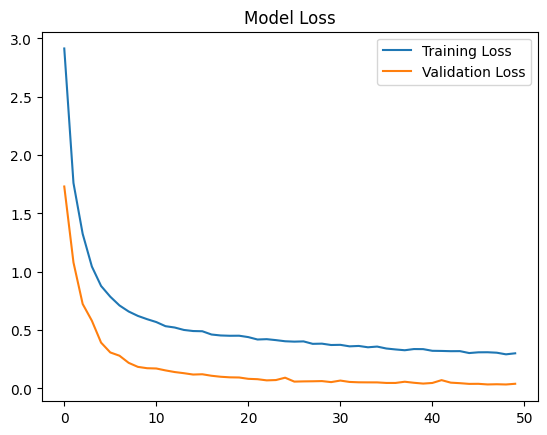

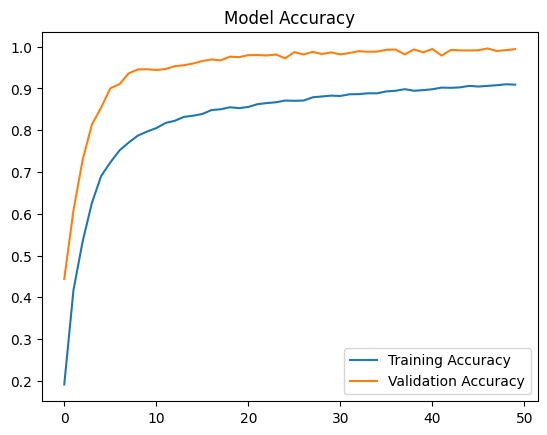

In [12]:
# Eğitim ve doğrulama kaybı
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

# Eğitim ve doğrulama doğruluğu
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


# Sonuç